In [ ]:
# ESE 419: Perceptron
# Reference: 
# [1] Gavin Hackeling, Mastering Machine Learning with scikit-learn
# [2] https://pythonmachinelearning.pro/perceptrons-the-first-neural-networks/

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets

In [70]:
class Perceptron(object):             
  def __init__(self, X_train, Y_train, lr=1, epochs=100, epsilon=1e-5):
    # add one for bias
    self.n, _ = X_train.shape
    self.X_train = np.c_[np.ones(self.n), X_train]
    _, self.d = self.X_train.shape
    self.W = np.zeros([self.d,1])
    self.epochs, self.lr, self.epsilon = epochs, lr, epsilon
    self.y_true = Y_train

  def activation_fn(self, x):
    return 2*(x>0)-1

  def predict(self, x):
    z = x.dot(self.W)
    a = self.activation_fn(z)
    return a   

  def seq_fit(self, verbose=False, plot=False):
    """
    Sequential Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      if np.all([np.squeeze(self.predict(self.X_train)) == np.squeeze(self.y_true)]):
        break
      for i in range(self.n):
        y_pred = self.predict(self.X_train[i])
        if y_pred != self.y_true[i]:
          self.W = self.W + self.y_true[i] * self.X_train[i].reshape([self.d,1])
      error_list.append(self.error())

      

      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)

    return self.W, error_list, epoch+1

  def batch_fit(self, verbose=False, plot=False):
    """
    Batch Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      y_pred = self.predict(self.X_train)
      if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
        update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)] 
                                          * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
        self.W += self.lr * update
        err = self.error()
        error_list.append(err)
      else:
        break
    
      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)
        
    return self.W, error_list, epoch+1

  def error(self, X_test=None, y_test=None):
    """
    Used to calculate the residual sum of squares (RSS) error.
    If X_test and y_test are not given, returns the training RSS,
    otherwise test RSS.
    """
    if X_test is None:
      diff = self.y_true-self.predict(self.X_train)
    else:
      diff = y_test-self.predict(X_test)
    return (diff.T@diff)[0,0]

  def plot(self, a, b, bias, epoch):
    y = self.y_true.reshape(len(self.y_true),)
    plt.plot(self.X_train[:, 1][y == -1], self.X_train[:, 2][y == -1], 'yo')
    plt.plot(self.X_train[:, 1][y ==  1], self.X_train[:, 2][y ==  1], 'ro')

    xx = np.linspace(-1,11,5000)
    yy = (a*xx + bias)/(-1*b)
    plt.plot(xx, yy,'b')
    plt.title("epoch "+str(epoch))
    plt.xlim(np.min(self.X_train[:, 1])-1, np.max(self.X_train[:, 1])+1)
    plt.ylim(np.min(self.X_train[:, 2])-1, np.max(self.X_train[:, 2])+1)
    plt.show()


Error at epoch 0: 0
epochs 0: the weight:[[3. ]
 [1.1]
 [0.9]] 



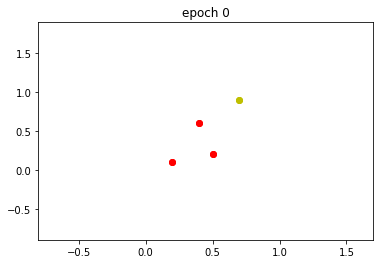

Error at epoch 1: 0
epochs 1: the weight:[[ 2.00000000e+00]
 [ 4.00000000e-01]
 [-1.11022302e-16]] 



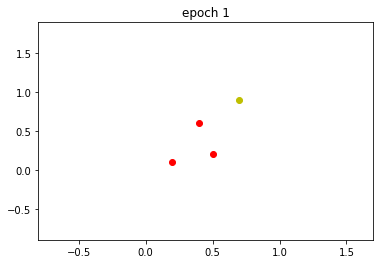

Error at epoch 2: 4
epochs 2: the weight:[[ 1. ]
 [-0.3]
 [-0.9]] 



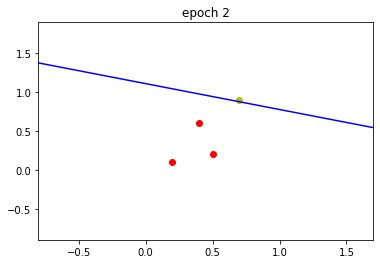

In [75]:
X = np.array([
    [0.2, 0.1],
    [0.4, 0.6],
    [0.5, 0.2],
    [0.7, 0.9]
])
y = np.array([1, 1, 1, -1]).reshape(4)
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'yo')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.xlim(-1,2)
plt.ylim(-0.75,1.25)
perceptron = Perceptron(X, y, epochs=5)
#w,err,_ = perceptron.seq_fit(plot=True)
w, err, _ = perceptron.batch_fit(verbose=True,plot=True)

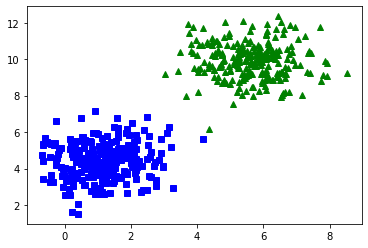

In [66]:
n = 500
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=1, random_state=1247)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train, Y_train, epochs=100)
w, in_err, converge_iter = perceptron.seq_fit(plot=False)

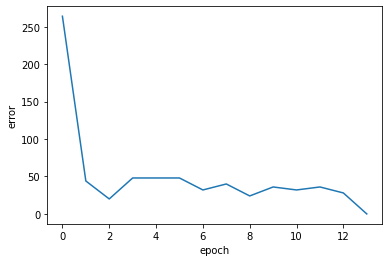

[264, 44, 20, 48, 48, 48, 32, 40, 24, 36, 32, 36, 28, 0]


In [67]:
plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)

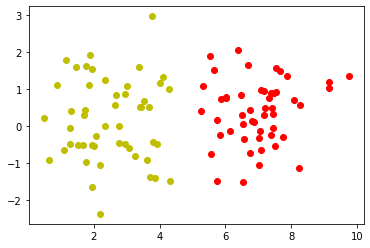

Error at epoch 0: 148
epochs 0: the weight:[[ 33.        ]
 [229.18776533]
 [ 12.70133781]] 



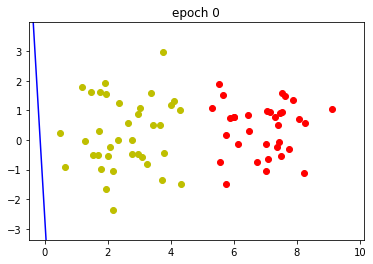

Error at epoch 1: 148
epochs 1: the weight:[[ -4.        ]
 [134.78057831]
 [  5.19776074]] 



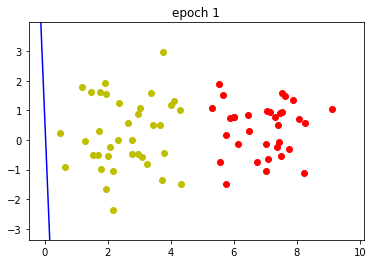

Error at epoch 2: 140
epochs 2: the weight:[[-41.        ]
 [ 40.37339128]
 [ -2.30581634]] 



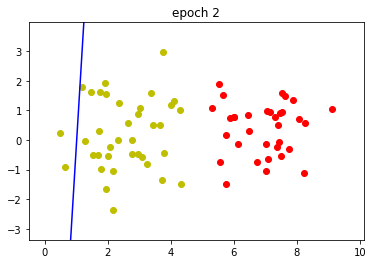

Error at epoch 3: 132
epochs 3: the weight:[[-76.        ]
 [-52.88303088]
 [-10.49154035]] 



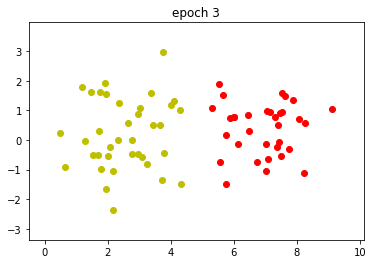

Error at epoch 4: 148
epochs 4: the weight:[[-43.        ]
 [176.30473446]
 [  2.20979746]] 



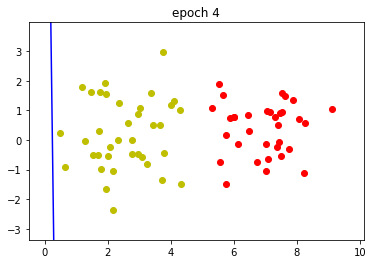

Error at epoch 5: 140
epochs 5: the weight:[[-80.        ]
 [ 81.89754743]
 [ -5.29377962]] 



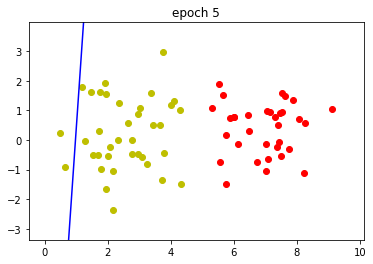

Error at epoch 6: 132
epochs 6: the weight:[[-115.        ]
 [ -11.35887473]
 [ -13.47950363]] 



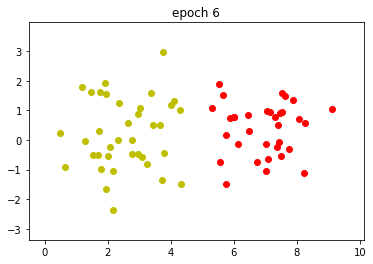

Error at epoch 7: 148
epochs 7: the weight:[[-82.        ]
 [217.8288906 ]
 [ -0.77816582]] 



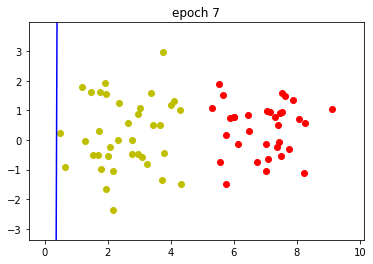

Error at epoch 8: 140
epochs 8: the weight:[[-119.        ]
 [ 123.42170358]
 [  -8.28174289]] 



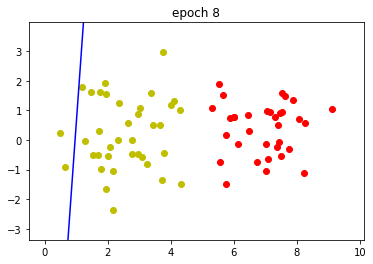

Error at epoch 9: 16
epochs 9: the weight:[[-154.        ]
 [  30.16528142]
 [ -16.46746691]] 



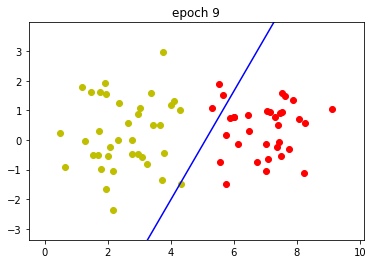

Error at epoch 10: 24
epochs 10: the weight:[[-152.        ]
 [  42.36671391]
 [ -10.47932536]] 



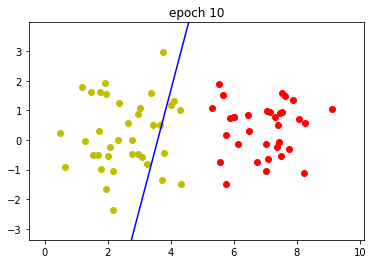

Error at epoch 11: 128
epochs 11: the weight:[[-158.        ]
 [  18.13804918]
 [ -10.70128777]] 



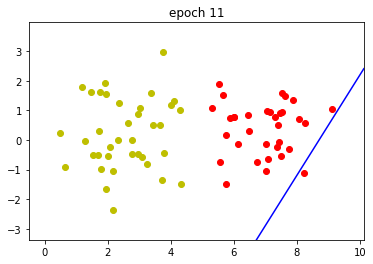

Error at epoch 12: 144
epochs 12: the weight:[[-126.        ]
 [ 239.08679398]
 [   3.11957323]] 



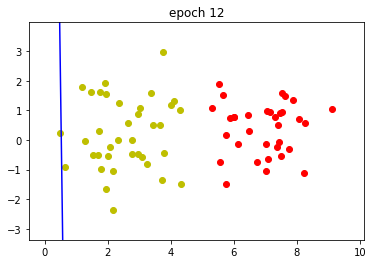

Error at epoch 13: 140
epochs 13: the weight:[[-162.        ]
 [ 145.17962584]
 [  -4.15648522]] 



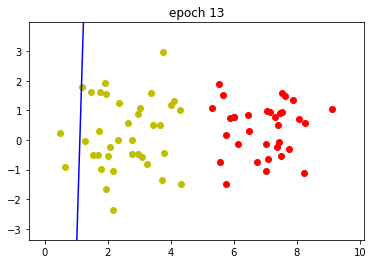

Error at epoch 14: 20
epochs 14: the weight:[[-197.        ]
 [  51.92320368]
 [ -12.34220923]] 



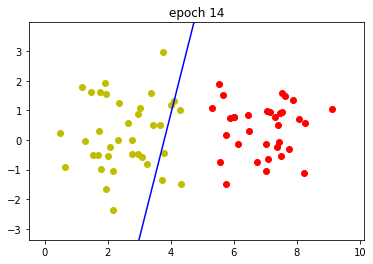

Error at epoch 15: 44
epochs 15: the weight:[[-202.        ]
 [  31.69645403]
 [ -11.39608821]] 



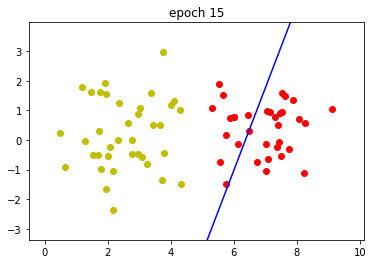

Error at epoch 16: 100
epochs 16: the weight:[[-191.        ]
 [  95.75325241]
 [  -5.96713126]] 



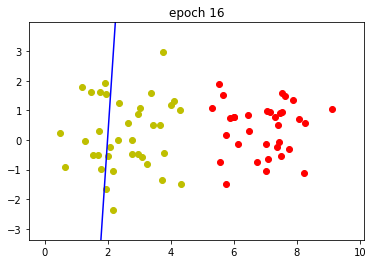

Error at epoch 17: 132
epochs 17: the weight:[[-216.        ]
 [  18.74628129]
 [  -7.39994931]] 



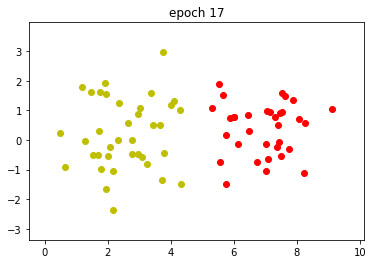

Error at epoch 18: 140
epochs 18: the weight:[[-183.        ]
 [ 247.93404662]
 [   5.3013885 ]] 



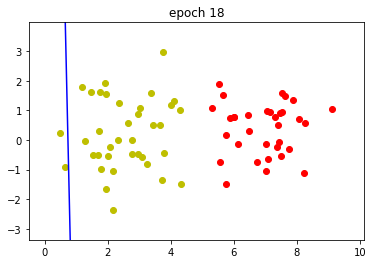

Error at epoch 19: 132
epochs 19: the weight:[[-218.        ]
 [ 154.67762446]
 [  -2.88433551]] 



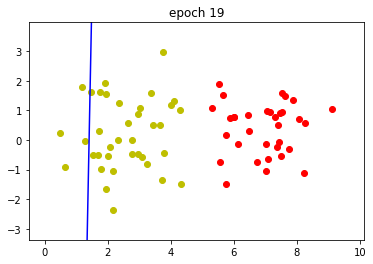

Error at epoch 20: 8
epochs 20: the weight:[[-251.        ]
 [  63.86694253]
 [  -9.33564996]] 



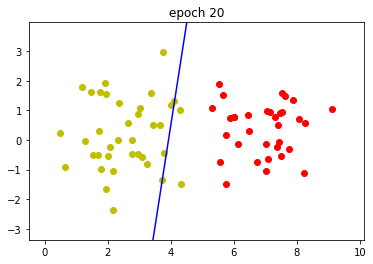

Error at epoch 21: 0
epochs 21: the weight:[[-253.        ]
 [  55.2706409 ]
 [  -8.86467876]] 



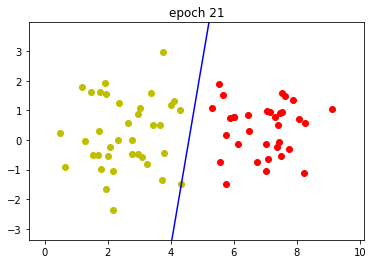

[[-253.        ]
 [  55.2706409 ]
 [  -8.86467876]] [148, 148, 140, 132, 148, 140, 132, 148, 140, 16, 24, 128, 144, 140, 20, 44, 100, 132, 140, 132, 8, 0] 23


In [78]:
# Try to modify the parameter cluster_std to make data not linearly seperable
n=100
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=1, random_state=41)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'yo')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train, Y_train, epochs=200)
w, in_err, converge_iter = perceptron.batch_fit(verbose=True,plot=True)
print(w, in_err, converge_iter)

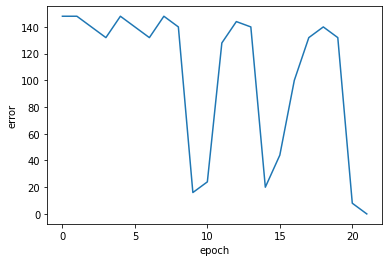

[148, 148, 140, 132, 148, 140, 132, 148, 140, 16, 24, 128, 144, 140, 20, 44, 100, 132, 140, 132, 8, 0]


In [79]:
plt.plot(in_err)
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)